In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('epi_r.csv')
data.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


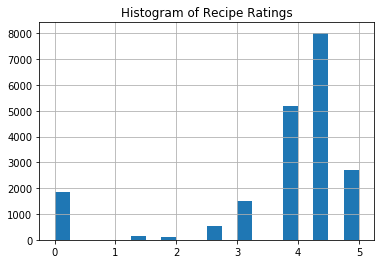

In [3]:
data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [4]:
X = data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = data.rating

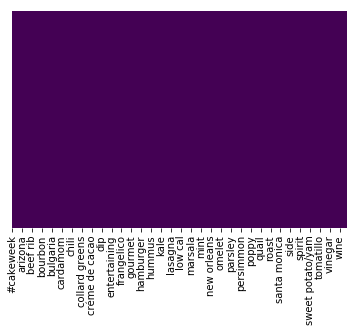

In [5]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
X.isnull().values.any()

False

In [8]:
Y.isnull().values.any()

False

In [9]:
def binary(col):
    if col <= 4:
        return 0
    else:
        return 1

In [10]:
Y = Y.apply(binary)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=30)

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
x_pca = pca.transform(X)

In [20]:
x_pca.shape

(20052, 30)

In [21]:
Y.shape

(20052,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, 
                                                    Y, test_size=0.30, 
                                                    random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\shuaix\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50      2767
           1       0.60      0.70      0.64      3249

   micro avg       0.58      0.58      0.58      6016
   macro avg       0.58      0.57      0.57      6016
weighted avg       0.58      0.58      0.57      6016



In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(logmodel, X_test, y_test, cv=5)

c:\users\shuaix\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shuaix\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shuaix\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shuaix\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shuaix\appdata\local\programs\python\python37\l

array([0.57890365, 0.60299003, 0.56857855, 0.55029094, 0.57737105])

## After data cleaning and PCA, we got much improved results even though it's not strictly a very high accuracy but much of an improvement from before.

In [30]:
from sklearn.svm import SVC

In [31]:
model = SVC()

In [32]:
model.fit(X_train,y_train)

c:\users\shuaix\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))

[[1032 1735]
 [ 775 2474]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.37      0.45      2767
           1       0.59      0.76      0.66      3249

   micro avg       0.58      0.58      0.58      6016
   macro avg       0.58      0.57      0.56      6016
weighted avg       0.58      0.58      0.57      6016



## Gridsearch

In [37]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [40]:
grid.fit(X_train,y_train)

c:\users\shuaix\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5540598290598291, total=   7.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5583582727661394, total=   6.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.549807610089782, total=   6.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5743589743589743, total=   6.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5703292005130398, total=   6.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5775972637879435, total=   6.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5491452991452992, total=   6.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.546387345019239, total=   6.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5448909790508765, total=   6.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .......

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.5735356990166738, total=   7.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.5692603676784951, total=   6.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5876068376068376, total=  13.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5756733646857631, total=  13.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5782385634886704, total=  12.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5664529914529914, total= 1.0min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5671227020094057, total= 1.0min
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 18.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [41]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [42]:
grid_predictions = grid.predict(X_test)

In [43]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      2767
           1       0.61      0.73      0.67      3249

   micro avg       0.61      0.61      0.61      6016
   macro avg       0.61      0.60      0.59      6016
weighted avg       0.61      0.61      0.60      6016



## The results slightly improved after Gridsearch process.